In [91]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification

In [92]:
X,y = make_classification(n_samples=200,n_features = 5, n_informative=5, n_redundant=0, n_clusters_per_class=1)

In [93]:
df = pd.DataFrame(X,columns = ['col1','col2','col3', 'col4', 'col5'])
df['target'] = y
print(df.shape)
df.head()

(200, 6)


,col1,col2,col3,col4,col5,target
0,1.090502,-0.531943,0.096701,-0.037305,-0.506093,1
1,0.477862,0.319186,-2.116672,-0.811170,0.650681,0
2,1.304756,1.744550,-1.873587,-0.538676,0.780586,0
3,-2.183289,1.374678,0.620112,2.312545,2.687655,1
4,-0.627755,-0.708255,1.587618,0.773902,1.663667,1


In [94]:
# funtion for row sampling
def sample_rows(df,percent):
  return df.sample(int(percent*df.shape[0]),replace=True)


In [95]:
# funtion for feature sampling
def sample_features(df, percent):
    cols = np.random.sample(df.columns.tolist()[:-1], size=int(percent * df.shape[1]))
    return df[cols]



In [96]:
# function for combined sampling
def combined_sampling(df,row_percent,col_percent):
  new_df = sample_rows(df,row_percent)
  return sample_features(new_df,col_percent)

In [97]:
df1 = sample_rows(df,0.2)
df2 = sample_rows(df,0.2)
df3 = sample_rows(df,0.2)

In [98]:
df1.shape

(40, 6)

In [99]:
from sklearn.tree import DecisionTreeClassifier
clf1 = DecisionTreeClassifier()
clf2 = DecisionTreeClassifier()
clf3 = DecisionTreeClassifier()


In [100]:
clf1.fit(df1.iloc[:,0:5],df1.iloc[:,-1])
clf2.fit(df2.iloc[:,0:5],df2.iloc[:,-1])
clf3.fit(df3.iloc[:,0:5],df3.iloc[:,-1])

DecisionTreeClassifier()

[Text(0.625, 0.875, 'x[3] <= 0.783\ngini = 0.48\nsamples = 40\nvalue = [24, 16]'),
 Text(0.5, 0.625, 'x[1] <= -0.931\ngini = 0.32\nsamples = 30\nvalue = [24, 6]'),
 Text(0.25, 0.375, 'x[3] <= -1.921\ngini = 0.278\nsamples = 6\nvalue = [1, 5]'),
 Text(0.125, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.375, 0.125, 'gini = 0.0\nsamples = 5\nvalue = [0, 5]'),
 Text(0.75, 0.375, 'x[2] <= 2.522\ngini = 0.08\nsamples = 24\nvalue = [23, 1]'),
 Text(0.625, 0.125, 'gini = 0.0\nsamples = 23\nvalue = [23, 0]'),
 Text(0.875, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.75, 0.625, 'gini = 0.0\nsamples = 10\nvalue = [0, 10]')]

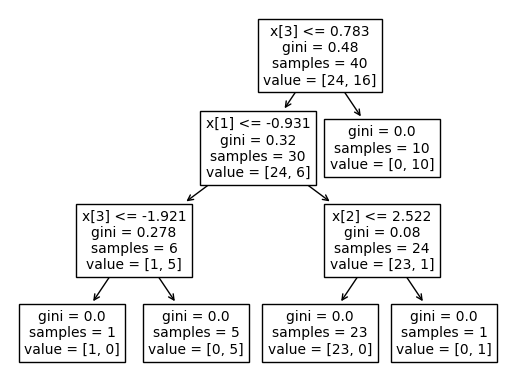

In [101]:
from sklearn.tree import plot_tree
plot_tree(clf1)

[Text(0.6, 0.8333333333333334, 'x[3] <= 0.598\ngini = 0.499\nsamples = 40\nvalue = [21, 19]'),
 Text(0.4, 0.5, 'x[1] <= -1.921\ngini = 0.269\nsamples = 25\nvalue = [21, 4]'),
 Text(0.2, 0.16666666666666666, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(0.6, 0.16666666666666666, 'gini = 0.0\nsamples = 21\nvalue = [21, 0]'),
 Text(0.8, 0.5, 'gini = 0.0\nsamples = 15\nvalue = [0, 15]')]

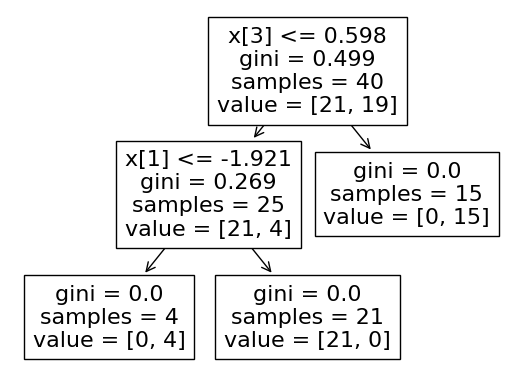

In [102]:
plot_tree(clf2)

[Text(0.6, 0.8333333333333334, 'x[3] <= 0.598\ngini = 0.499\nsamples = 40\nvalue = [21, 19]'),
 Text(0.4, 0.5, 'x[1] <= -1.921\ngini = 0.269\nsamples = 25\nvalue = [21, 4]'),
 Text(0.2, 0.16666666666666666, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(0.6, 0.16666666666666666, 'gini = 0.0\nsamples = 21\nvalue = [21, 0]'),
 Text(0.8, 0.5, 'gini = 0.0\nsamples = 15\nvalue = [0, 15]')]

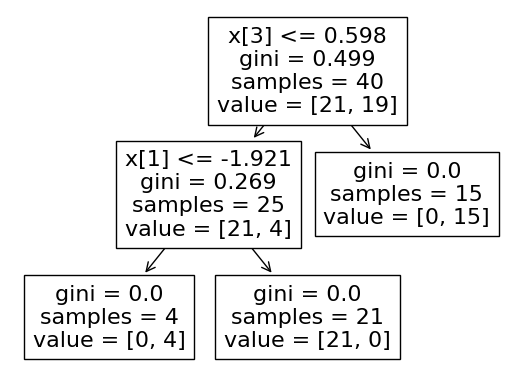

In [103]:
plot_tree(clf2)

[Text(0.6, 0.875, 'x[3] <= 0.76\ngini = 0.469\nsamples = 40\nvalue = [25, 15]'),
 Text(0.4, 0.625, 'x[1] <= -1.116\ngini = 0.278\nsamples = 30\nvalue = [25, 5]'),
 Text(0.2, 0.375, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(0.6, 0.375, 'x[2] <= 1.763\ngini = 0.074\nsamples = 26\nvalue = [25, 1]'),
 Text(0.4, 0.125, 'gini = 0.0\nsamples = 25\nvalue = [25, 0]'),
 Text(0.8, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.8, 0.625, 'gini = 0.0\nsamples = 10\nvalue = [0, 10]')]

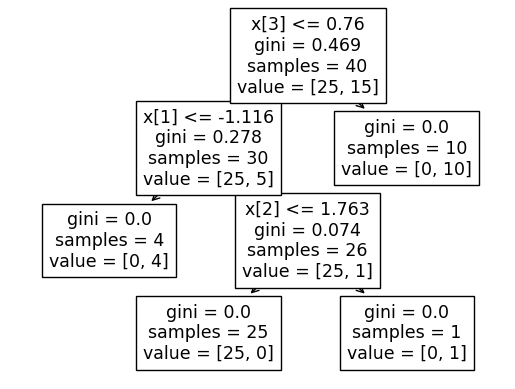

In [104]:
plot_tree(clf3)

In [105]:
clf1.predict(np.array([0.551380, -1807618, -1807618, -1.557932, -0.039800]).reshape(1,5))

C:\Users\ashmi\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [106]:
clf2.predict(np.array([0.551380, -1807618, -1807618, -1.557932, -0.039800]).reshape(1,5))

C:\Users\ashmi\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [107]:
clf3.predict(np.array([0.551380, -1807618, -1807618, -1.557932, -0.039800]).reshape(1,5))

C:\Users\ashmi\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

So, our model predict yes because 2 model saying yes or 1 model saying No

In [108]:
from sklearn.ensemble import RandomForestClassifier
rf1 = RandomForestClassifier()


In [113]:
rf1.fit(df1.iloc[:,0:5],df1.iloc[:,-1])
rf1.fit(df2.iloc[:,0:5],df2.iloc[:,-1])
rf1.fit(df.iloc[:,0:5],df.iloc[:,-1])

RandomForestClassifier()

In [114]:
rf1.predict(np.array([0.551380, -1807618, -1807618, -1.557932, -0.039800]).reshape(1,5))

C:\Users\ashmi\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([1])